In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
# Load 2 years of daily data
data = yf.download('AAPL', start='2022-01-01', end='2024-12-31')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

/tmp/ipython-input-55-218175232.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [ ]:
for i in range(1, 6):
    data[f'Close_t-{i}'] = data['Close'].shift(i)

# Moving Averages
data['MA_3'] = data['Close'].shift(1).rolling(window=3).mean()
data['MA_7'] = data['Close'].shift(1).rolling(window=7).mean()

# Momentum
data['Momentum'] = data['Close'].shift(1) - data['Close'].shift(4)

# Target: next day's Close price
data['Target'] = data['Close'].shift(-1)

# Drop rows with NaNs
data.dropna(inplace=True)

# ✅ Step 3: Prepare training data
features = [col for col in data.columns if col not in ['Target', 'Close']]
X = data[features]
y = data['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
print(len(X_train))
print(len(X_test))

595
149


In [ ]:
# model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Price      Ticker
Open       AAPL      1.887274e+02
High       AAPL      1.913551e+02
Low        AAPL      1.886278e+02
Close      AAPL      1.894042e+02
Volume     AAPL      5.306800e+07
Close_t-1            1.891056e+02
Close_t-2            1.890957e+02
Close_t-3            1.860101e+02
Close_t-4            1.900114e+02
Close_t-5            1.914546e+02
MA_3                 1.880705e+02
MA_7                 1.892592e+02
Momentum            -9.057617e-01
Target               1.903996e+02
Name: 2024-05-29 00:00:00, dtype: float64
Price      Ticker
Open       AAPL      1.898720e+02
High       AAPL      1.912854e+02
Low        AAPL      1.897427e+02
Close      AAPL      1.903996e+02
Volume     AAPL      4.994790e+07
Close_t-1            1.894042e+02
Close_t-2            1.891056e+02
Close_t-3            1.890957e+02
Close_t-4            1.860101e+02
Close_t-5            1.900114e+02
MA_3                 1.892018e+02
MA_7                 1.893189e+02
Momentum             3.394119e+00
Targ

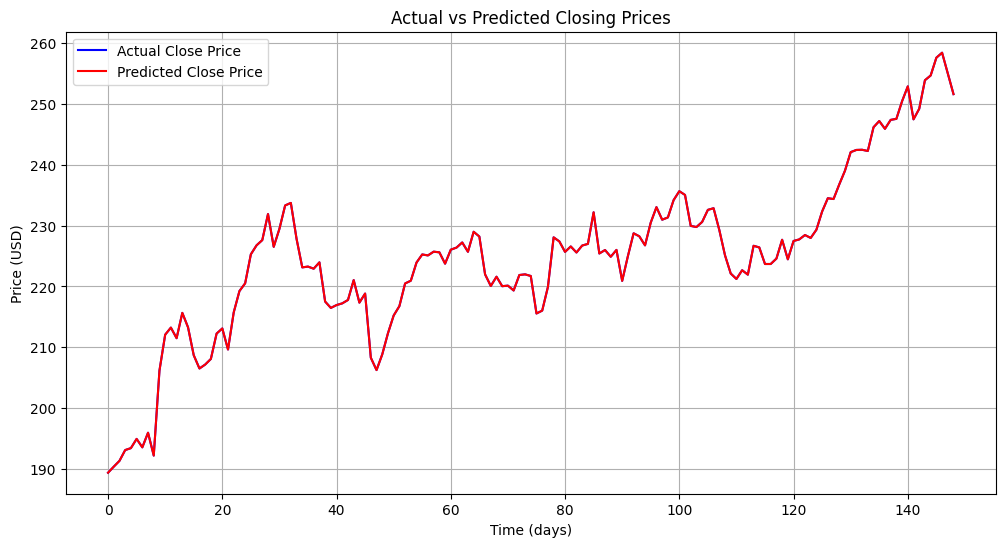

In [ ]:
y_pred = model.predict(X_test)
print(X_test.iloc[1])  # Second column
print(X_test.iloc[2])  # Third column

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.15f}")

# 📊 Step 7: Plot Actual vs Predicted Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time (days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


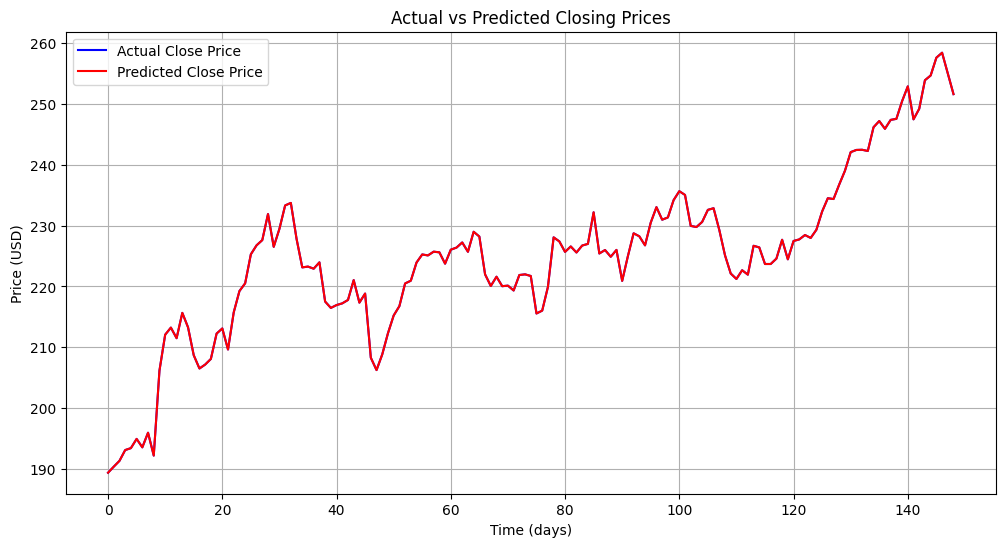

In [ ]:
# Plotting actual vs predicted Close prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time (days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print((data['Target'] - data['Close_t-1']).describe())


count    744.000000
mean       0.218332
std        4.073477
min      -12.571198
25%       -2.254223
50%        0.293427
75%        2.937332
max       19.857162
dtype: float64
